In [1]:
!pip install seaborn==0.9.0 
!pip install matplotlib==1.4.3
!pip install duration

In [0]:
import pandas as pd
from duration import (
    to_seconds
)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(f"Seaborn {sns.__version__}, Pandas {pd.__version__}")

Seaborn 0.9.0, Pandas 0.22.0


In [0]:
dfs = pd.read_html('challenge.html')[0]

In [0]:
df = dfs.drop(columns=['Nome', 'Clube/ Equipe'])

In [6]:
df.head()

,Col,Num,Sx,Cat,Tempo Oficial:,Col.Cat
0,1.0,4442,M,VENC.M,00:52:12,1
1,2.0,4469,F,VENC.F,00:53:37,1
2,3.0,4220,M,VENC.M,00:56:14,2
3,4.0,4246,M,VENC.M,00:58:56,3
4,5.0,4055,M,M45/49,00:59:24,1


In [0]:
time = df.head(1)['Tempo Oficial:'][0]
seconds = to_seconds(time, strict=False) # 91405

In [8]:
seconds, time

(3132, '00:52:12')

In [9]:
52*60 + 12

3132

In [10]:
df['Tempo Oficial:'].head()

0    00:52:12
1    00:53:37
2    00:56:14
3    00:58:56
4    00:59:24
Name: Tempo Oficial:, dtype: object

In [0]:
df['TempoEmSegundos'] = df['Tempo Oficial:'].apply(to_seconds)
df['TempoEmSegundos'] = df['TempoEmSegundos'].round(2)

In [0]:
def to_minutes(seconds):
  minutes = seconds // 60
  seconds = (seconds - (60 * minutes)) 
  return minutes + (seconds / 100)
  

df['TempoEmMinutos'] = df['TempoEmSegundos'].apply(to_minutes)

In [0]:
df = df.drop(columns='Tempo Oficial:')

In [14]:
df.head()

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
0,1.0,4442,M,VENC.M,1,3132,52.12
1,2.0,4469,F,VENC.F,1,3217,53.37
2,3.0,4220,M,VENC.M,2,3374,56.14
3,4.0,4246,M,VENC.M,3,3536,58.56
4,5.0,4055,M,M45/49,1,3564,59.24


In [15]:
df['TempoEmSegundos'].describe()

count      509.000000
mean      7034.972495
std       2770.871975
min       3132.000000
25%       5367.000000
50%       6537.000000
75%       8120.000000
max      45300.000000
Name: TempoEmSegundos, dtype: float64

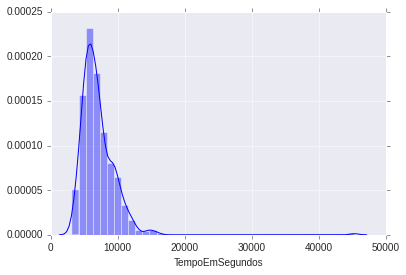

In [16]:
sns.set_style('darkgrid')
sns.distplot(df['TempoEmSegundos'], bins=40)

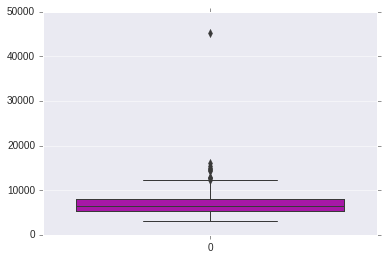

In [17]:
fig = sns.boxplot( palette=["m", "g"], data=df['TempoEmSegundos'])
fig

In [18]:
df['TempoEmSegundos'] > 30000

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
479    False
480    False
481    False
482    False
483    False
484    False
485    False
486    False
487    False
488    False
489    False
490    False
491    False
492    False
493    False
494    False
495    False
496    False
497    False
498    False
499    False
500    False
501    False
502    False
503    False
504    False
505    False
506    False
507    False
508     True
Name: TempoEmSegundos, Length: 509, dtype: bool

In [19]:
df.tail()

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
504,505.0,4288,F,F35/39,26,14793,246.33
505,506.0,4569,F,F40/44,16,14972,249.32
506,507.0,4587,F,F50/54,14,15431,257.11
507,508.0,4135,M,M35/39,68,15995,266.35
508,509.0,4205,M,M50/54,42,45300,755.00


In [0]:
df = df.drop([508])

In [21]:
df.tail(20)

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
488,489.0,4466,F,F55/59,15,11397,189.57
489,490.0,4611,M,M25/29,21,11537,192.17
490,491.0,4162,M,M35/39,66,11655,194.15
491,492.0,4134,M,M40/44,63,11795,196.35
492,493.0,4142,M,M25/29,22,11802,196.42
493,494.0,4621,F,F60/64,3,11936,198.56
494,495.0,4520,M,M17/19,7,12055,200.55
495,496.0,4406,M,M60/64,9,12070,201.10
496,497.0,4622,F,F35/39,25,12117,201.57
497,498.0,4616,M,M55/59,29,12194,203.14


In [0]:
df_fem = df[df['Sx'] == 'F']
df_fem = df_fem.reset_index()

df_mas = df[df['Sx'] == 'M']
df_mas = df_mas.reset_index()

In [23]:
df_fem.tail()

,index,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
126,496,497.0,4622,F,F35/39,25,12117,201.57
127,499,500.0,4145,F,F45/49,19,12710,211.50
128,504,505.0,4288,F,F35/39,26,14793,246.33
129,505,506.0,4569,F,F40/44,16,14972,249.32
130,506,507.0,4587,F,F50/54,14,15431,257.11


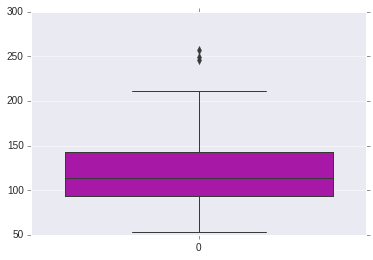

In [24]:
sns.boxplot(palette=["m", "g"], data=df_fem['TempoEmMinutos'])

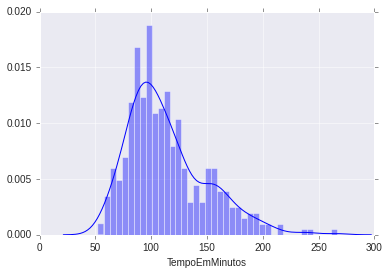

In [25]:
sns.set_style('darkgrid')
sns.distplot(df_mas['TempoEmMinutos'], bins=40)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


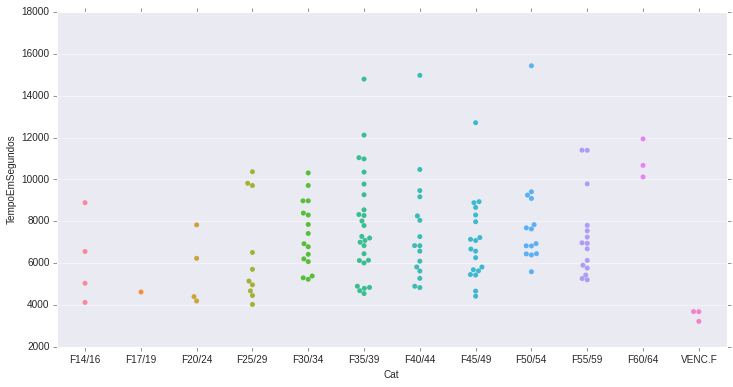

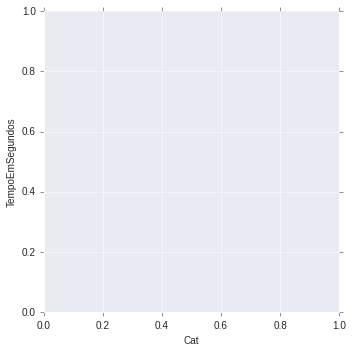

In [26]:
cats = sorted(list(df_fem['Cat'].unique()))
f, ax = plt.subplots(figsize=(12, 6))
plot = sns.catplot(x="Cat", y="TempoEmSegundos", kind="swarm", order=cats, data=df_fem, ax=ax)
plot

In [27]:
df_mas.head()

,index,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
0,0,1.0,4442,M,VENC.M,1,3132,52.12
1,2,3.0,4220,M,VENC.M,2,3374,56.14
2,3,4.0,4246,M,VENC.M,3,3536,58.56
3,4,5.0,4055,M,M45/49,1,3564,59.24
4,5,6.0,4120,M,M20/24,1,3568,59.28


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


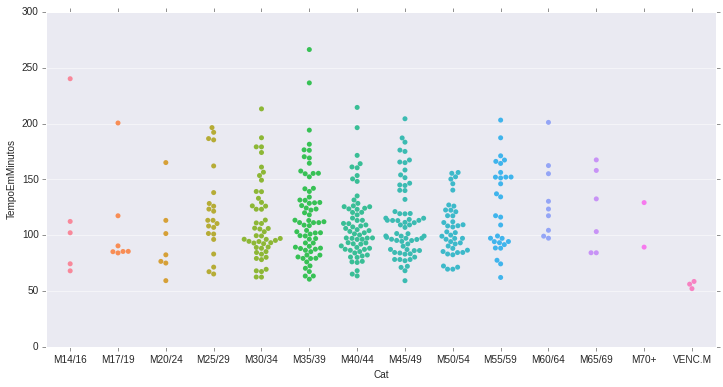

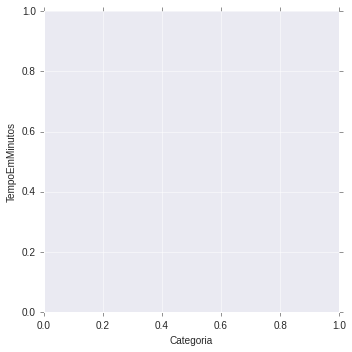

In [28]:
cats = sorted(list(df_mas['Cat'].unique()))

f, ax = plt.subplots(figsize=(12,6))
plot = sns.catplot(x="Cat", y="TempoEmMinutos", kind="swarm", order=cats, data=df_mas, ax=ax)
plot.set_xlabels("Categoria")
plot

In [0]:
df_mas['Categoria'] = df_mas['Cat'].apply(lambda s: s if s.startswith('V') else s[1:])
df_fem['Categoria'] = df_fem['Cat'].apply(lambda s: s if s.startswith('V') else s[1:])

In [30]:
challange_mas_grouped = df_mas.groupby(['Categoria']).agg({'TempoEmMinutos': ['size','mean']})
challange_fem_grouped = df_fem.groupby(['Categoria']).agg({'TempoEmMinutos': ['size','mean']})
challange_mas_grouped

TempoEmMinutos            
                    size        mean
Categoria                           
14/16                  5  119.436000
17/19                  7  106.954286
20/24                  7   96.158571
25/29                 22  122.650455
30/34                 49  111.982041
35/39                 68  117.723088
40/44                 64  109.896719
45/49                 65  113.216769
50/54                 41  106.204390
55/59                 29  125.568621
60/64                  9  132.304444
65/69                  6  121.633333
70+                    2  109.270000
VENC.M                 3   55.606667

In [0]:
challange_mas_grouped.rename(columns={'size':'Qtd(M)','mean':'Tempo media(M)'},inplace=True)
challange_fem_grouped.rename(columns={'size':'Qtd(F)','mean':'Tempo media(F)'},inplace=True)

df_new = pd.concat([challange_mas_grouped, challange_fem_grouped], axis=1)
df_new.columns = df_new.columns.droplevel(0)

df_new['Qtd(M)'] = df_new['Qtd(M)'].fillna(0.0).astype(int)
df_new['Qtd(F)'] = df_new['Qtd(F)'].fillna(0.0).astype(int)

df_new['Tempo media(M)'] = df_new['Tempo media(M)'].fillna(0.0).astype(int)
df_new['Tempo media(F)'] = df_new['Tempo media(F)'].fillna(0.0).astype(int)


In [0]:
total = 603
completaram = df.shape[0]
percent_compl = round(completaram / total * 100,2)

In [0]:
group_sx = df['Sx'].value_counts()
qtd_masc = group_sx[0]
qtd_fem = group_sx[1]
percent_masc = round(qtd_masc / total * 100,2)
percent_fem = round(qtd_fem / total * 100,2)

In [34]:
df['TempoEmMinutos'].mean().round(2)

115.8

In [35]:
df_tempo = df.groupby('Sx')['TempoEmMinutos'].mean().round(2)
tempo_media_masc = df_tempo[1]
tempo_media_fem  = df_tempo[0]
tempo_geral = df['TempoEmMinutos'].mean().round(2)

tempo_media_fem

121.53

In [36]:
print(f"Prova Challenge - 3.5km - Copacabana - 22/12/2018")
print(f"Participantes: {total} / Completaram: {completaram} ({percent_compl}%)")
print(f"Qtd por sexo: {qtd_fem} ({percent_fem}%) (F) / {qtd_masc} ({percent_masc}%) (M)")
print(f"Tempo media (Minutos): {tempo_media_fem} (F) / {tempo_media_masc} (M), {tempo_geral} (Geral)")
print()
print("Por categoria, dividido entre homens (M) e mulheres (F)")
df_new

Prova Challenge - 3.5km - Copacabana - 22/12/2018
Participantes: 603 / Completaram: 508 (84.25%)
Qtd por sexo: 131 (21.72%) (F) / 377 (62.52%) (M)
Tempo media (Minutos): 121.53 (F) / 113.8 (M), 115.8 (Geral)

Por categoria, dividido entre homens (M) e mulheres (F)


,Qtd(M),Tempo media(M),Qtd(F),Tempo media(F)
14/16,5,119,4,102
17/19,7,106,1,76
20/24,7,96,4,94
25/29,22,122,10,108
30/34,49,111,16,122
35/39,68,117,26,129
40/44,64,109,16,125
45/49,65,113,19,116
50/54,41,106,14,132
55/59,29,125,15,121
